# CH3: Classification 

### P114 - P146

### MNIST dataset 

### Binary CLassifier 
#### 1, sklearn.linear_model import SGDClassifier 
#### 2, CV
#### 3, sklearn.metric import confusion_matrix, precision_score, recall_score, f1_score
#### 4, ROC curve 

### Multiclass Classification 
#### 1, OvO and OvA 
#### 2, error analysis ploting 
#### 3, multiple binary labels 
#### 4, multiple output classification 

In [3]:
### set up 

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [5]:
### MNIST 

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset

In [7]:
# look at the array 
X, y = mnist["data"], mnist["target"]

In [8]:
# X 
X.shape

(70000, 784)

In [9]:
# y 
y.shape 

(70000,)

Saving figure some_digit_plot


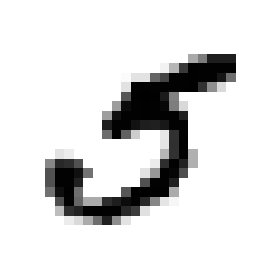

In [10]:
### show the image 

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [12]:
### split the training and test set 

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### shuffle the dataset 

import numpy as np 

shuffle_index  = np.random.permutation(60000) 
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Binary Classifier 

In [13]:
# target 
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [15]:
### SGD 

from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state = 42) 
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [16]:
### preidct if it is 5 or not 

sgd_clf.predict([some_digit])


array([ True])

### Performce Measurement 

In [18]:
### CV 

from sklearn.model_selection import cross_val_score 
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.9651 , 0.95615, 0.9635 ])

In [20]:
### the baseline 

from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
### the accuracy of the baseline

never_5_clf = Never5Classifier()

cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

### skewed 

# 90% percent of the images is not 5 

array([0.90965, 0.91135, 0.90795])

In [22]:
### Confusion matrix

# get the prediction 
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# get maxtirx 
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train_5, y_train_pred)

array([[53110,  1469],
       [  836,  4585]], dtype=int64)

In [23]:
### Precision: TP/ TP + FP 

### Recall: TP/TP + FN 

from sklearn.metrics import precision_score, recall_score



In [25]:
precision_score(y_train_5, y_train_pred)

0.7573505120581434

In [26]:
recall_score(y_train_5, y_train_pred)

0.845784910533112

In [27]:
### f1 score 

from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.799128540305011

In [28]:
### Prediction and Recall Tradeoff 

### using decision_function() 

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([3786.91976651])

In [31]:
# zero threshold
threshold = 0 
y_some_digit_pred = (y_scores > threshold )

y_some_digit_pred

array([ True])

In [33]:
# high threshold 
threshold = 10000
y_some_digit_pred = (y_scores > threshold )

y_some_digit_pred

array([False])

In [38]:
### sklearn version issue 

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [39]:
### decide on the threshold 

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

### ploting the precision/ recall curve 

from sklearn.metrics import precision_recall_curve 

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


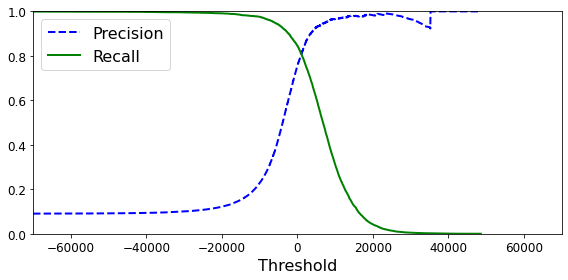

In [41]:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-70000, 70000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [44]:
### want to have threshold > 7000

y_train_pred_90 = (y_scores > 7000)


In [45]:
# precision score 
precision_score(y_train_5, y_train_pred_90)

0.9463711119056132

In [48]:
### the ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

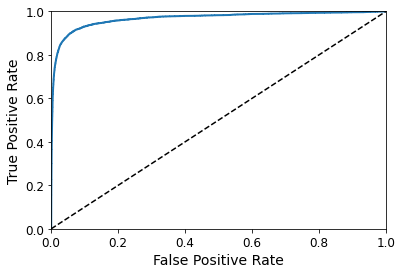

In [49]:
### plot using matplot 

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [51]:
### the roc - auc - score 

from sklearn.metrics import roc_auc_score 
roc_auc_score(y_train_5, y_scores)

0.9676483295307359

In [52]:
### compare with RandomForestClassifer 

from sklearn.ensemble import RandomForestClassifier


forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")


In [53]:
# convert the prob to the score 
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

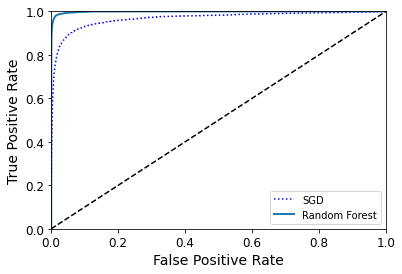

In [55]:
# plot two the roc curves
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

### Multiclass 

In [56]:
### the sklearn can automatically detect a multiclass 

sgd_clf.fit(X_train, y_train) 
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [57]:
### If want to choose between OvO & OvA 

### use sklearn.multiclass import OneVsOneClassifier 

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\JZ\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\JZ\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.8961 , 0.90525, 0.9059 ])

### Error Analysis 

In [58]:
### confusion matrix 
    
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

conf_mx

NameError: name 'X_train_scaled' is not defined

In [ ]:
### the image represetation of the confusion matrix 

plt.matshow(conf_mx, cmap = plt.cm.gray) 
plt.show()

In [1]:
### fill the diagonal with zeros to keep only the errors 

### and plot the result 

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


NameError: name 'conf_mx' is not defined

### Multilabel | Multibinary Classification 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
# multilabel 
y_multilabel = np.c_[y_train_large, y_train_odd]

# KNN
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)


# output 
knn_clf.predict([some_digit])

